In [5]:
using Plots
using Random

# Single Brownian particle

A single brownian particle with mobility $\Gamma = 1 / \zeta$ follows

$$
    \dot x(t) = \sqrt{ 2 \Gamma T  } \eta(t)
$$

    where $\eta(t)$ is unit white noise with
    $$
        \langle x(t)x(t') \rangle = \delta(t - t')
    $$

and $ T $ the temperature. The Ensitein relation then says $ D = \Gamma T $

In [6]:
T = 6e-0
Γ = 3.e-1
N = 1024
dt = 1e-2
par = (dt=dt, T=T, Γ=Γ)

(dt = 0.01, T = 6.0, Γ = 0.3)

There is no stiff part linear part, som exponential time step and Euler method is the same,

$$
    x_{n + 1} = x_n + \sqrt{ \Gamma T \Delta t  } \eta_n,
$$

where $\eta_n$ is withe noise with

$$
    \langle \eta_n \eta_{n'} \rangle = \delta_{nn'}.
$$

In [7]:
function step(x, par)
    dt, Γ, T = par.dt, par.Γ, par.T
    η = randn()
    return x + sqrt( 2 * Γ * T * dt ) * η
end

step (generic function with 1 method)

In [8]:
N = 10_000
M = 10_000

function sim(par, M, N)    
    xList = zeros(N, M)
    for i in 1:N
        x = xList[i, 1]
        for j in 1:M-1
            x = step(x, par)
            xList[i,j+1] = x
        end
    end
    return xList
end

xList = sim(par, M, N);


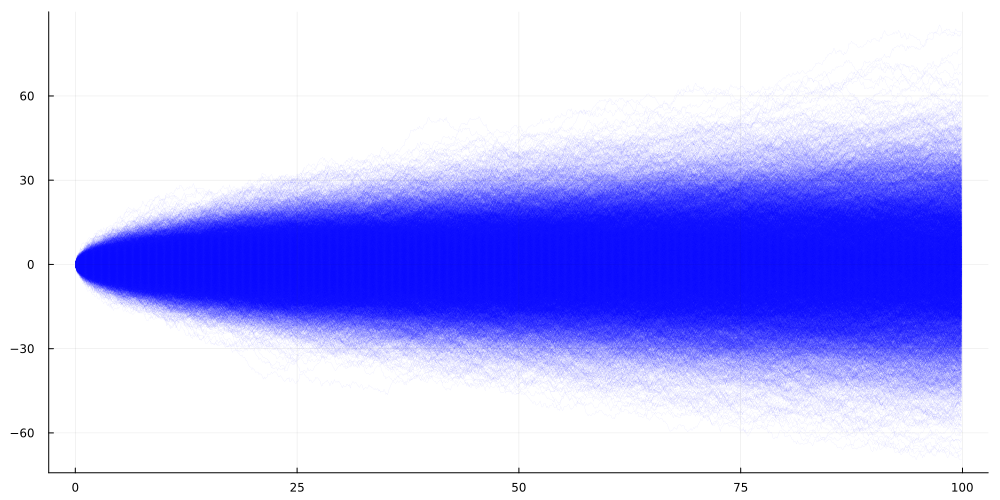

In [9]:
t = [0:M-1;] * dt
n = 10
default(fmt = :png)
p = plot(t[1:n:end], (xList')[1:n:end, :], color=:blue, alpha=.4, lw=.02)
plot!(size=(1000, 500), legend=false)
display("image/png", p)


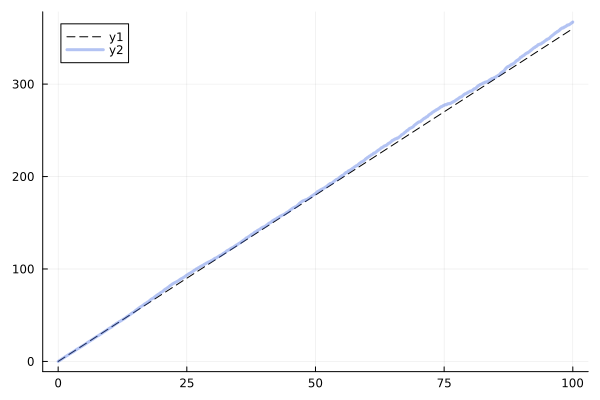

In [10]:
x0xt = zeros(M)
for i in 1:N
    @. x0xt += (xList[i, 1] - xList[i, :] )^2
end
x0xt *= 1 / (N - 1)

plot(t, 2*(Γ * T) * t, color=:black, ls=:dash)
plot!(t, x0xt, color=:royalblue, lw=3, alpha=.4)

Test some more parameters

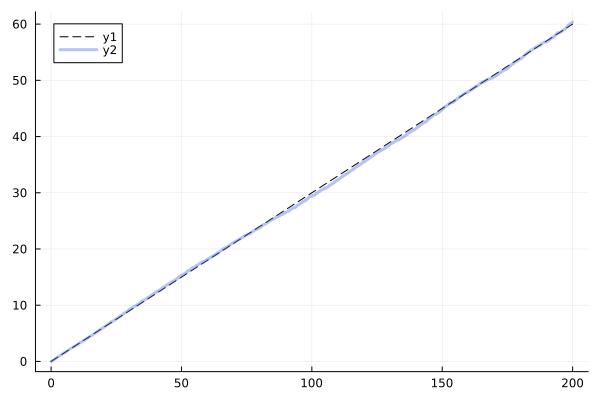

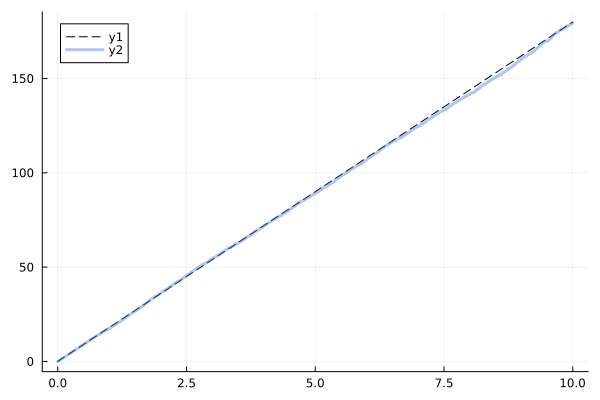

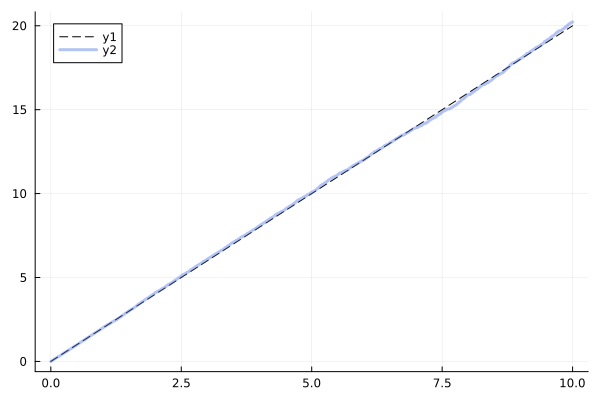

In [11]:
par1 = (dt=2e-2, T=.3, Γ=.5)
par2 = (dt=1e-3, T=10., Γ=.9)
par3 = (dt=1e-3, T=0.01, Γ=100.)

for par in (par1, par2, par3)
    M = N = 10_000
    p = plot()

    xList = sim(par, M, N)
    x0xt = zeros(M)
    for i in 1:N
        @. x0xt += (xList[i, 1] - xList[i, :] )^2
    end
    x0xt *= 1 / (N - 1)

    t = [0:M-1;] * par.dt
    p = plot(t, 2*(par.Γ * par.T) * t, color=:black, ls=:dash)
    plot!(t, x0xt, color=:royalblue, lw=3, alpha=.4)
    display(p)
end

# Single particle in a well

Single particle in a potential
$$
    V(x) = \frac{1}{2} x^2
$$

feels a force
$$
    f(x) = - V'(x) = - x(t).
$$

Including noise from a thermal bath at temepratur $T$, with mobility $\Gamma$, the equatin of motion is

$$
    \dot x(t) = - \Gamma x(t) + \sqrt{2 \Gamma T} \eta(t)
$$

In [12]:
L = 100
N = 1024
M = 100_000
dt = 1e-2
dx = L / N
T = 6e-0
Γ = 5.

c = - Γ
k = exp(c * dt);


par = (L=L, N=N, M=M, dt=dt, dx=dx, T=T, Γ=Γ, c=c, k=k)

(L = 100, N = 1024, M = 100000, dt = 0.01, dx = 0.09765625, T = 6.0, Γ = 5.0, c = -5.0, k = 0.951229424500714)

In [13]:
function etd(x, par)
    Γ, T, dt, k = par.Γ, par.T, par.dt, par.k
    η = randn()
    return k * ( x + sqrt( 2 * Γ * T * dt ) * η )
end

etd (generic function with 1 method)

In [14]:
function run(par)
    xt = zeros(par.M)
    x = 0
    xt[1] = x

    for i in 2:M
        for j in 1:N
            x = etd(x, par)
            xt[i] = x
        end
    end
    return xt
end

run (generic function with 1 method)

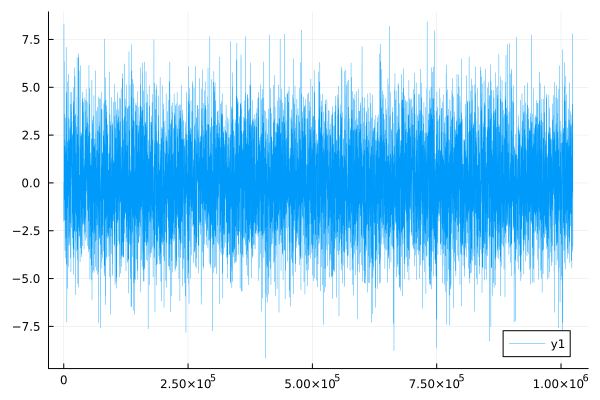

In [15]:
xt = run(par)
t = [1:par.M;] * par.dt * par.N
n = 10
p = plot(t[1:n:end], xt[1:n:end], lw=.4)
display("image/png", p)

This should fit the Boltzmann distribution

$$
    p(x) = \frac{1}{\sqrt{2 \pi T}} \mathrm{exp} \left( - \frac{x^2}{2 T} \right)
$$

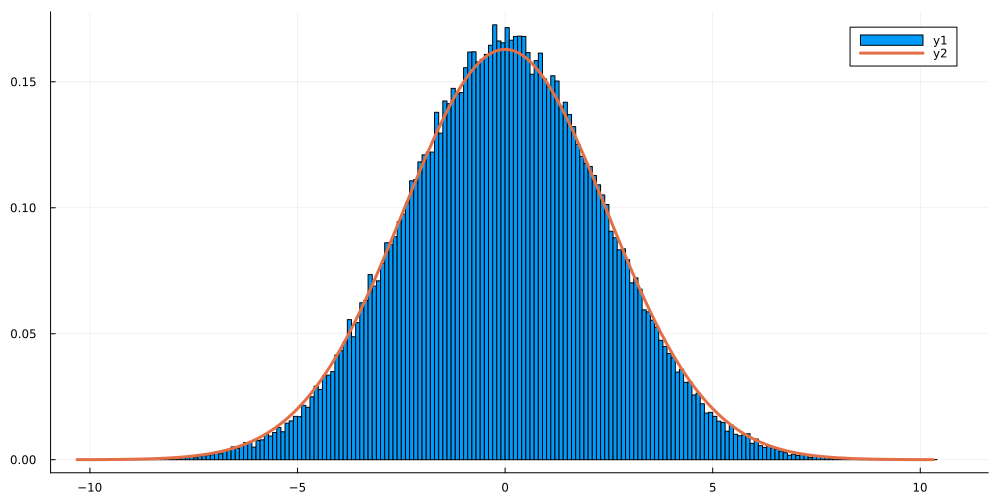

In [16]:
function plot_hist(xt, par)
    p = histogram(xt, normalize=:pdf, bins=200)
    xm = maximum(xt)
    x = LinRange(-xm, xm, 1000)
    plot!( x, @. exp(- x^2 / ( 2 * par.T)) / sqrt(2 * π * par.T); lw=3)
    plot!(size=(1000, 500))
    display(p)
end

plot_hist(xt, par)

Different parameters

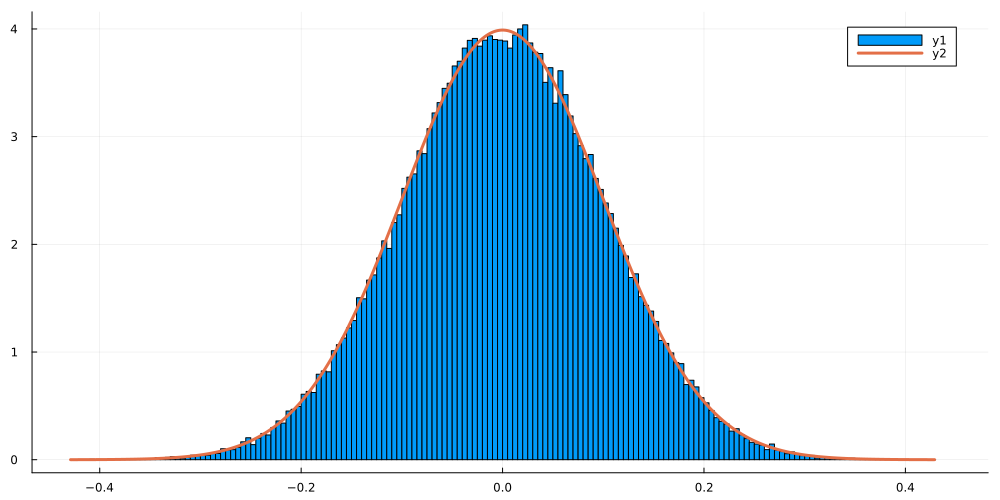

In [14]:
L = 100
N = 1024
M = 100_000
dt = 2e-3
dx = L / N
T = 0.01
Γ = 4.

c = - Γ
k = exp(c * dt);


par = (L=L, N=N, M=M, dt=dt, dx=dx, T=T, Γ=Γ, c=c, k=k)

xt = run(par)
plot_hist(xt, par)

Previously, the noise was descritized as

$$
    x_{n + 1} = e^{-c \Delta t} x_n + \frac{e^{c\Delta t} - 1}{c} \sqrt{2 T} \xi_n,
$$

In [19]:
function etd_old(x, par)
    Γ, T, dt, k, c = par.Γ, par.T, par.dt, par.k, par.c
    η = randn()
    return k * x + (k - 1) / c * sqrt( 2 * Γ * T ) * η 
end

function run_old(par)
    xt = zeros(par.M)
    x = 0
    xt[1] = x

    for i in 2:M
        for j in 1:N
            x = etd_old(x, par)
            xt[i] = x
        end
    end
    return xt
end

run_old (generic function with 1 method)

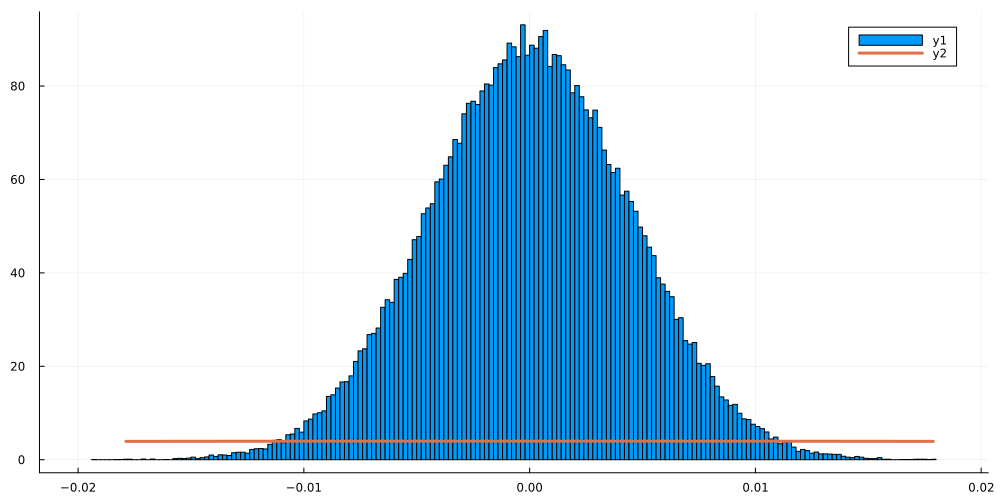

In [20]:
L = 100
N = 1024
M = 100_000
dt = 2e-3
dx = L / N
T = 0.01
Γ = 4.

c = - Γ
k = exp(c * dt);

par = (L=L, N=N, M=M, dt=dt, dx=dx, T=T, Γ=Γ, c=c, k=k)


xt = run_old(par)
plot_hist(xt, par)

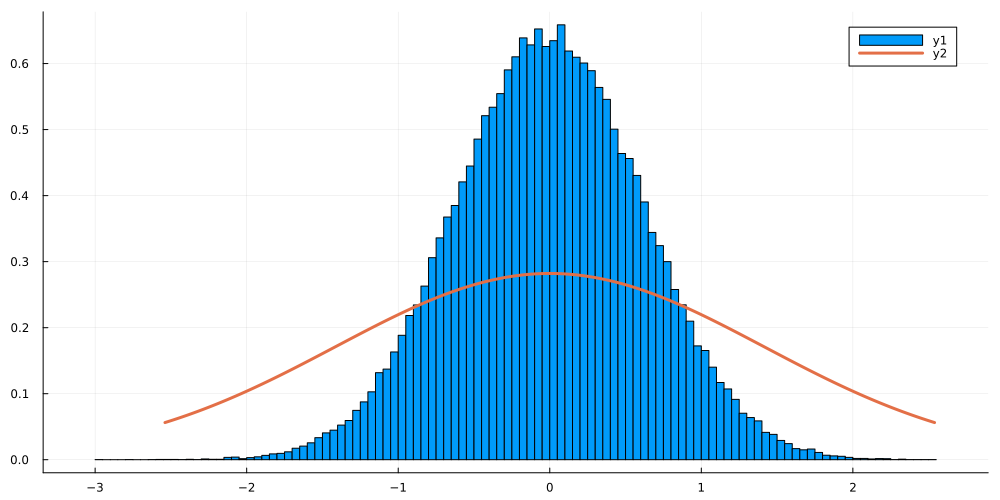

In [21]:
L = 100
N = 1024
M = 100_000
dt = 2e-1
dx = L / N
T = 2.
Γ = 4.

c = - Γ
k = exp(c * dt);

par = (L=L, N=N, M=M, dt=dt, dx=dx, T=T, Γ=Γ, c=c, k=k)


xt = run_old(par)
plot_hist(xt, par)